In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
import pandas as pd

df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0]
!pip install lxml
df.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,JS전선,5560,절연선 및 케이블 제조업,"선박선,고무선,전력선,통신선 제조",2007-11-12,12월,이익희,http://www.jscable.co.kr,충청남도
1,거북선2호,101380,NaN,운송장비(선박) 임대,2008-04-25,12월,신주선,NaN,부산광역시
2,거북선6호,114140,NaN,NaN,2009-10-01,12월,김연신,NaN,제주특별자치도
3,교보메리츠,64900,NaN,"부동산 투자,운용",2002-01-30,12월,김 상 진,NaN,서울특별시
4,국제관광공사,28780,NaN,NaN,1966-03-18,12월,NaN,NaN,NaN


# 종목코드 갖고 오기

In [3]:
!pip install pandas_datareader
import pandas_datareader as pdr
yahoo = pdr.get_data_yahoo('000270.KS')
yahoo

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-10-26,54800.0,53700.0,53700.0,54600.0,837088.0,49344.511719
2015-10-27,55300.0,54000.0,54900.0,55100.0,1037136.0,49796.386719
2015-10-28,55500.0,54100.0,55500.0,54800.0,762999.0,49525.261719
2015-10-29,55300.0,54200.0,54300.0,54800.0,511535.0,49525.261719
2015-10-30,55900.0,54300.0,54800.0,55800.0,979684.0,50429.007812
...,...,...,...,...,...,...
2020-10-19,47750.0,46600.0,47000.0,46700.0,1536628.0,46700.000000
2020-10-20,47150.0,43150.0,43150.0,46850.0,4399855.0,46850.000000
2020-10-21,46750.0,45050.0,46550.0,45450.0,2311018.0,45450.000000


1. 종목 코드 뽑아내기
2. 종목코드 입력해서 주가 뽑아내기
3. RNN 이용해서 종목 분석
* RNN-이름.ipynb : 메일로 제출
* 추천종목 포함해서 보내세요

In [4]:
# 종목 코드 뽑아내기
new_df = df[['회사명', '종목코드']]
new_df

,회사명,종목코드
0,JS전선,5560
1,거북선2호,101380
2,거북선6호,114140
3,교보메리츠,64900
4,국제관광공사,28780
...,...,...
3874,툴젠,199800
3875,플럼라인생명과학,222670
3876,피엔에이치테크,239890
3877,한국미라클피플사,331660


In [103]:
# rename
rename_df = new_df.rename(columns={'회사명':'name', '종목코드':'code'})
rename_df

,name,code
0,JS전선,5560
1,거북선2호,101380
2,거북선6호,114140
3,교보메리츠,64900
4,국제관광공사,28780
...,...,...
3874,툴젠,199800
3875,플럼라인생명과학,222670
3876,피엔에이치테크,239890
3877,한국미라클피플사,331660


In [104]:
# 회사명으로 코드 검색
def get_code(df, name):
    #code = df.query("name=='{}'".format(name))['code'].to_string(index=False)
    code = rename_df[(rename_df['name'] == name)]['code'].to_string(index=False)
    code = code.strip()
    return code

In [105]:
# 종목코드 입력해서 주가 뽑아내기(전처리)
rename_df.code = rename_df.code.map('{:06d}'.format)
# code 6자리 맞추기
rename_df

,name,code
0,JS전선,005560
1,거북선2호,101380
2,거북선6호,114140
3,교보메리츠,064900
4,국제관광공사,028780
...,...,...
3874,툴젠,199800
3875,플럼라인생명과학,222670
3876,피엔에이치테크,239890
3877,한국미라클피플사,331660


In [123]:
# name

<bound method Series.all of 0           JS전선
1          거북선2호
2          거북선6호
3          교보메리츠
4         국제관광공사
          ...   
3874          툴젠
3875    플럼라인생명과학
3876     피엔에이치테크
3877    한국미라클피플사
3878         휴벡셀
Name: name, Length: 3879, dtype: object>

In [141]:
# 회사명으로 코드 검색
com_name = 	'KB금융'
code = get_code(rename_df, com_name) + '.KS'
code

'105560.KS'

In [142]:
# 종목코드 입력해서 주가 뽑아내기
data = pdr.get_data_yahoo(code) # code = '톨젠'
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-10-26,37250.0,36500.0,37050.0,36800.0,526120.0,33662.425781
2015-10-27,36800.0,36300.0,36800.0,36750.0,451360.0,33616.687500
2015-10-28,36750.0,35850.0,36750.0,36150.0,641127.0,33067.847656
2015-10-29,36300.0,35550.0,35900.0,35650.0,770682.0,32610.478516
2015-10-30,36400.0,35700.0,35800.0,36150.0,1137794.0,33067.847656
...,...,...,...,...,...,...
2020-10-19,41450.0,39700.0,39850.0,40700.0,2737109.0,40700.000000
2020-10-20,41100.0,40050.0,40500.0,40750.0,1531385.0,40750.000000
2020-10-21,41700.0,40450.0,40750.0,41450.0,2378411.0,41450.000000


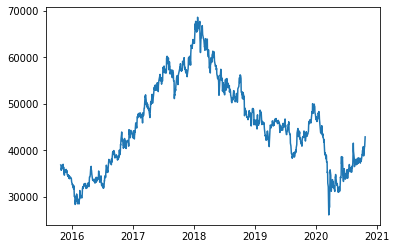

In [143]:
# 시각화
plt.plot(data.index, data["Close"])

In [144]:
cut_line =  int(np.round(data.shape[0] * 0.2))
cut_line

244

In [145]:
# 전처리
x_train = pd.DataFrame(data.Close[:-cut_line])
x_test = pd.DataFrame(data.Close[-cut_line:])
data.shape, x_train.shape, x_test.shape

((1220, 6), (976, 1), (244, 1))

In [146]:
# Scale Data, 정규화 과정
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# MinMaxScaler : 0 ~ 1 사이로 정규화함
scaler.fit(x_train)
s_train = scaler.transform(x_train)
s_test = scaler.transform(x_test)
s_train.shape, s_test.shape

((976, 1), (244, 1))

In [182]:
# time series Generator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

length = 50 # 길어질수록 학습의 정확도는 높아짐
ts_train = TimeseriesGenerator(s_train, s_train, length=length, batch_size = 1)
ts_test = TimeseriesGenerator(s_test, s_test, length=length, batch_size = 1)
# stride: 연속되는 출력 시퀀스 사이의 기간. 보폭이 s이면, 연속되는 출력 샘플은 data[i]를 중심으로, data[i+s], data[i+2*s] 등이 됩니다.
# batch_size: 각 배치의 (마지막을 제외한) 시간 단계 샘플의 수.
# length = 50 : 50번째 값을 예측함

In [183]:
# lstm
model_lstm = tf.keras.models.Sequential()
model_lstm.add(tf.keras.layers.LSTM(64, input_shape=(length,1) ))
model_lstm.add(tf.keras.layers.Dense(1))

In [184]:
model_lstm.compile(optimizer='adam', loss='mse')

In [185]:
model_lstm.fit(ts_train, epochs=8)

Epoch 1/8
926/926 [==============================] - 4s 4ms/step - loss: 0.0044
Epoch 2/8
926/926 [==============================] - 4s 4ms/step - loss: 0.0012
Epoch 3/8
926/926 [==============================] - 4s 4ms/step - loss: 0.0010
Epoch 4/8
926/926 [==============================] - 4s 4ms/step - loss: 7.7964e-04
Epoch 5/8
926/926 [==============================] - 4s 4ms/step - loss: 7.8819e-04
Epoch 6/8
926/926 [==============================] - 4s 4ms/step - loss: 6.0363e-04
Epoch 7/8
926/926 [==============================] - 4s 4ms/step - loss: 5.8412e-04
Epoch 8/8
926/926 [==============================] - 4s 4ms/step - loss: 5.3936e-04


In [186]:
# 예측 테스트
p_test_lstm = model_lstm.predict(ts_test)
ts_test[0][0].shape, p_test_lstm.shape

((1, 50, 1), (194, 1))

In [187]:
# 정규화 원상복귀
r_test_lstm = scaler.inverse_transform(p_test_lstm)
# .inverse_transfor : 정규화(0~1) 한 것을 다시 원상 복귀

In [188]:
# x_test 크기 맞추고, 합치기
cut_x_test = x_test.drop(x_test.index[0:length])
cut_x_test['lstm'] = r_test_lstm
cut_x_test

,Close,lstm
Date,,
2020-01-13,46700.0,47091.710938
2020-01-14,47850.0,47057.484375
2020-01-15,47900.0,47984.824219
2020-01-16,48000.0,48213.265625
2020-01-17,47900.0,48245.957031
...,...,...
2020-10-19,40700.0,39665.339844
2020-10-20,40750.0,40815.859375
2020-10-21,41450.0,41141.636719


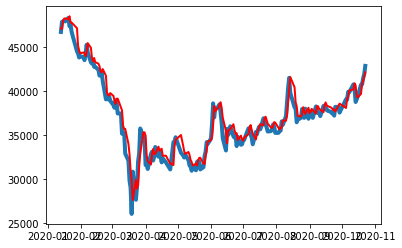

In [189]:
# 시각화
plt.plot(cut_x_test.index, cut_x_test["Close"], linewidth = 4.0)
plt.plot(cut_x_test.index, cut_x_test.lstm,color='red', linewidth = 2.0)

In [190]:
# 미래 예측
batch = s_test[-length:]

forecast_LSTM = []
c_batch_lstm = batch.reshape((1, length, 1))
num = 6

for i in range(num):
  c_predict_lstm = model_lstm.predict(c_batch_lstm)[0]
  forecast_LSTM.append(c_predict_lstm)
  c_batch_lstm = np.append(c_batch_lstm[:,1:,:], [[c_predict_lstm]], axis=1)

In [191]:
# 정규화 되돌리기
forecast_lstm = scaler.inverse_transform(forecast_LSTM)
forecast_lstm.shape

(6, 1)

In [192]:
# shape 맞추기
reset_df = cut_x_test.reset_index()
forecast_ind = np.arange(reset_df.index[-1], reset_df.index[-1]+num )
reset_df, forecast_ind, forecast_ind.shape

(          Date    Close          lstm
 0   2020-01-13  46700.0  47091.710938
 1   2020-01-14  47850.0  47057.484375
 2   2020-01-15  47900.0  47984.824219
 3   2020-01-16  48000.0  48213.265625
 4   2020-01-17  47900.0  48245.957031
 ..         ...      ...           ...
 189 2020-10-19  40700.0  39665.339844
 190 2020-10-20  40750.0  40815.859375
 191 2020-10-21  41450.0  41141.636719
 192 2020-10-22  41900.0  41663.535156
 193 2020-10-23  42850.0  42121.035156
 
 [194 rows x 3 columns], array([193, 194, 195, 196, 197, 198]), (6,))

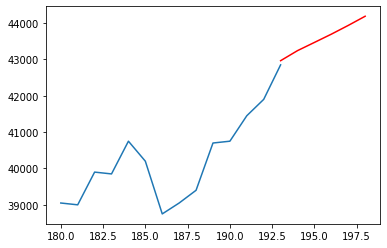

In [193]:
# 시각화
plt.plot(reset_df.index[180:], reset_df["Close"][180:])
plt.plot(forecast_ind, forecast_lstm, color='red')